Define paths

In [2]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
# from numerical.countPeaksAnalysisFunctions import countPeaks
# from numerical.fourierAnalysisFunctions import entropyFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks




import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
cmap = cm.Spectral_r
from sklearn import preprocessing

Define variables and upload data for figures

In [4]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='nogrowth'
# parID=41018#[41018,30997]
# parID=41018#[41018,30997]
L=50; x_gridpoints=5; J=L*x_gridpoints;I=J 
T=500; t_gridpoints = 25; N=T*t_gridpoints #Number of timepoints
# filename='%s_variant%s_%s_ID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,mechanism,parID,L,J,T,N)
filename = lambda parID: '%s_variant%s_%s_ID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,mechanism,parID,L,J,T,N)
# U = pickle.load( open(modelingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename), 'rb'))


Plot solution U with peaks

In [ ]:
def countPeaks(U, showplot1D=True):
    peaks = [0,0]
    peaks[0], _ = find_peaks(U[0], prominence=0.1)
    peaks[1], _ = find_peaks(U[1], prominence=0.1)
    print(peaks)
    plot1D(U,peaks=peaks)
    
    return peaks
    


In [8]:



def varPeakDist(U, showplot1D=True,printVar=True):
    peaks = countPeaks(U, showplot1D=showplot1D)
    #calculate distance between peaks
    peak0 = peaks[0]
    #calculate distance between peaks in peak0
    var=[0,0]
    for count,peak in enumerate(peaks):
        if len(peak)>1:
            peak_dist = [np.linalg.norm(peak[i]-peak[i+1]) for i in range(len(peak)-1)]
            peak_dist = peak_dist/np.sum(peak_dist)
            var[count] = np.var(peak_dist)
        else:
            var[count] = 1
    if printVar==True:
        print(var)

    return var

In [40]:
parID=41018
U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
n_peaks=[]
position_peaks = []
for count,UX_snapshot in enumerate(U_record[0][-20:]):
    peaks, _ = find_peaks(UX_snapshot, prominence=0.1)
    n_peaks.append(len(peaks))
    position_peaks.append(peaks)

if all(x==n_peaks[0] for x in n_peaks):
    print('constant number of peaks')

if np.all([x==position_peaks[0] for x in position_peaks]):
    print('constant position peaks')


constant number of peaks
constant position peaks


In [25]:
dx = float(L)/float(J-1)

x_grid = np.array([j*dx for j in range(J)])
reduced_t_grid = np.arange(0,T,10) 

surfpattern(U_record, grids=[x_grid,reduced_t_grid], growth='linear',morphogen=1, rate=0, savefig=False,filename='',logResults=False,normalize=False,L=L,J=J,T=T,record_every_x_hours=10)



TypeError: surfpattern() got an unexpected keyword argument 'L'

[array([], dtype=int64), array([], dtype=int64)]
morphogen = both
show


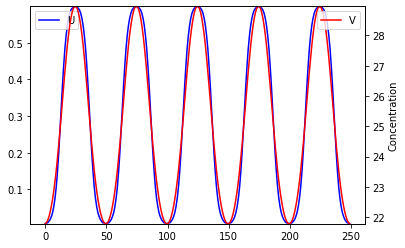

[1, 1]


In [9]:

parID=1
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
# entropy = entropyPeakDist(U,plotHist=False)
var=varPeakDist(U)


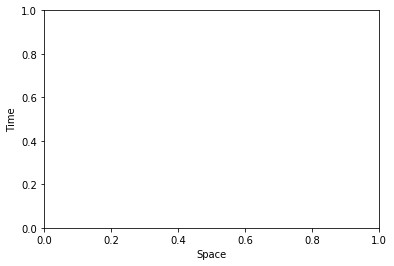

[1, 1]


In [8]:
parID=30997
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)


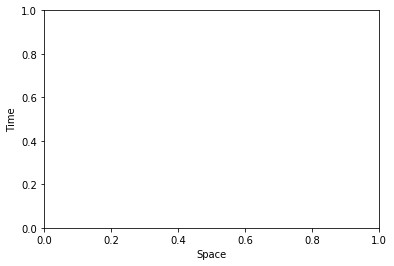

[1, 1]


In [9]:
parID=1
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)
